In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
X = df
y = X.pop("species")

In [6]:
X.shape

(150, 4)

In [7]:
# Standardize the data set
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [8]:
# Covariance matrix on X_std
# print ("Covariance Matrix: \n%s" %np.cov(X_std.T))
cov_mat = np.cov(X_std.T)

In [9]:
# Eigen values and Eigen vectors
eig_vals, eig_vec = np.linalg.eig(cov_mat)
print ("Eigen Values are : {}".format(eig_vals))
print "-------------------------------------------------------------------------------------"
print ("Eigen Vectors are :  \n{}".format(eig_vec))

Eigen Values are : [ 2.93035378  0.92740362  0.14834223  0.02074601]
-------------------------------------------------------------------------------------
Eigen Vectors are :  
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [10]:
# Check the eigen vectors are unit length. Or in other words
# they are normalized
for ev in eig_vec:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [11]:
# Sort the eigen values
a = list(eig_vals)
print sorted(a, reverse=True)

[2.9303537755893179, 0.92740362151734146, 0.14834222648163961, 0.020746013995595936]


In [12]:
# Let's just keep top 2
imp_vectors = eig_vec[:,0:2]
imp_vectors

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [13]:
Y = X_std.dot(imp_vectors)

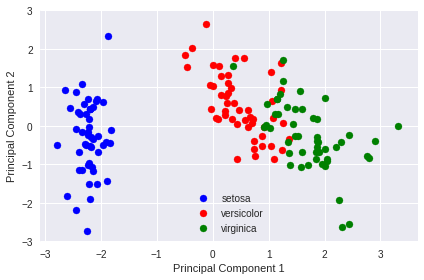

In [14]:
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [15]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

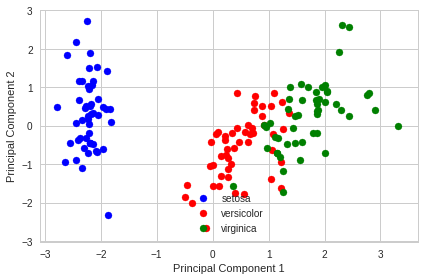

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [17]:
# WHy are the plots inverted